     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.3 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=e0615e04fe662c38278e68bae9ad8e65e704226981f8b48e9baf7829ee6bcba2
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=560dc85794028c184a35ca6bffb6ec22820c65ef88bd5c0a03e4401ccb99d210
  Stored in directory: /root/.cache/pip/wheels/e0/8c/e0/294d2e4ea0e55792bfc99b6b263e4a0511443da7b69af67688
Successfully built langdetect emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


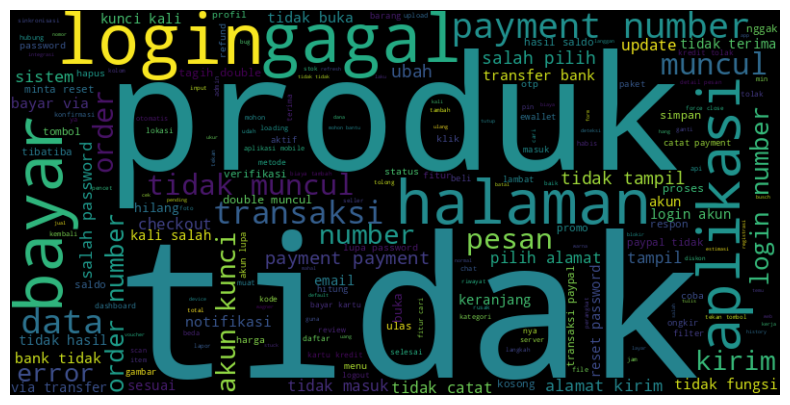

                                             text
0     login number akun kunci kali salah password
1            login tidak login akun lupa password
3                  order salah pilih alamat kirim
4  login number minta reset password tidak terima
8            login akun kunci kali salah password
Number of rows after cleaning and filtering: 314


In [ ]:
# Install library yang dibutuhkan
!pip install pandas numpy nltk spacy Sastrawi clean-text langdetect wordcloud
!python -m spacy download en_core_web_sm

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import library
import pandas as pd
import numpy as np
import nltk
import spacy
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from cleantext import clean
from langdetect import detect
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')

# Load data dari Google Drive
file_path = '/content/drive/MyDrive/datasets/conversations.csv'  # Sesuaikan path dan nama file Anda
df = pd.read_csv(file_path)

# 1. Handle missing values - hapus baris dengan kolom penting kosong
df.dropna(subset=['subject', 'preview'], inplace=True)

# 2. Hapus data duplikat
df.drop_duplicates(inplace=True)

# 3. Gabungkan kolom teks subject dan preview
df['text'] = df['subject'].astype(str) + ' ' + df['preview'].astype(str)

# 4. Ubah teks menjadi huruf kecil (lowercase)
df['text'] = df['text'].str.lower()

# 5. Bersihkan teks menggunakan clean-text (hapus url, email, nomor telepon, angka, simbol)
df['text'] = df['text'].apply(lambda x: clean(
    x, fix_unicode=True, no_urls=True,
    no_emails=True, no_phone_numbers=True, no_numbers=True,
    no_digits=True, no_currency_symbols=True, no_punct=True,
    replace_with_punct=""
))

# 6. Stopwords removal dengan pengecualian kata negasi (untuk bahasa Indonesia)
stop_words = set(stopwords.words('indonesian'))
negations = {'tidak', 'bukan', 'tak'}
stop_words = [w for w in stop_words if w not in negations]
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

# 7. Stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['text'] = df['text'].apply(lambda x: stemmer.stem(x))

# 8. Deteksi bahasa (opsional, untuk memastikan hanya data bahasa Indonesia diproses)
df['language'] = df['text'].apply(lambda x: detect(x) if isinstance(x, str) and x.strip() != '' else 'unknown')
df = df[df['language'] == 'id']

# 9. Visualisasi kata menggunakan wordcloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 10. Cek hasil cleaning dan simpan data
print(df[['text']].head())
print(f"Number of rows after cleaning and filtering: {len(df)}")
df.to_csv('/content/drive/MyDrive/datasets/cleaned_conversations.csv', index=False)

#Tahap Preprocessing

In [ ]:
# Gabungkan kolom subject dan preview menjadi satu kolom text
df['text'] = df['subject'].astype(str) + ' ' + df['preview'].astype(str)

# Preview hasil dalam tabel
from IPython.display import display
display(df[['subject', 'preview', 'text']].head())


,subject,preview,text
0,Masalah Login - 1,Akun terkunci setelah beberapa kali salah pass...,Masalah Login - 1 Akun terkunci setelah bebera...
1,Masalah Login,Tidak bisa login ke akun karena lupa password.,Masalah Login Tidak bisa login ke akun karena ...
3,Masalah Order,Kesalahan saat memilih alamat pengiriman.,Masalah Order Kesalahan saat memilih alamat pe...
4,Masalah Login - 1,Permintaan reset password tidak diterima.,Masalah Login - 1 Permintaan reset password ti...
8,Masalah Login,Akun terkunci setelah beberapa kali salah pass...,Masalah Login Akun terkunci setelah beberapa k...


In [ ]:
# Ubah seluruh teks jadi huruf kecil
df['text'] = df['text'].str.lower()

# Preview hasil dalam tabel
display(df[['text']].head())


,text
0,masalah login - 1 akun terkunci setelah bebera...
1,masalah login tidak bisa login ke akun karena ...
3,masalah order kesalahan saat memilih alamat pe...
4,masalah login - 1 permintaan reset password ti...
8,masalah login akun terkunci setelah beberapa k...


In [ ]:
import re

def remove_patterns(text):
    # Hapus URL
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Hapus email
    text = re.sub(r'\S+@\S+', '', text)
    # Hapus nomor telepon (angka berurutan min 8 digit)
    text = re.sub(r'\b\d{8,}\b', '', text)
    return text

# Terapkan pada seluruh kolom text
df['text'] = df['text'].apply(remove_patterns)

# Preview hasil dalam tabel
display(df[['text']].head())


,text
0,masalah login - 1 akun terkunci setelah bebera...
1,masalah login tidak bisa login ke akun karena ...
3,masalah order kesalahan saat memilih alamat pe...
4,masalah login - 1 permintaan reset password ti...
8,masalah login akun terkunci setelah beberapa k...


In [ ]:
def clean_symbols(text):
    # Hapus simbol, tanda baca, dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['text'] = df['text'].apply(clean_symbols)

display(df[['text']].head())


,text
0,masalah login akun terkunci setelah beberapa...
1,masalah login tidak bisa login ke akun karena ...
3,masalah order kesalahan saat memilih alamat pe...
4,masalah login permintaan reset password tida...
8,masalah login akun terkunci setelah beberapa k...


In [ ]:
# Tokenisasi menggunakan split sederhana
df['tokens'] = df['text'].apply(lambda x: x.split())

display(df[['text', 'tokens']].head())


,text,tokens
0,masalah login akun terkunci setelah beberapa...,"[masalah, login, akun, terkunci, setelah, bebe..."
1,masalah login tidak bisa login ke akun karena ...,"[masalah, login, tidak, bisa, login, ke, akun,..."
3,masalah order kesalahan saat memilih alamat pe...,"[masalah, order, kesalahan, saat, memilih, ala..."
4,masalah login permintaan reset password tida...,"[masalah, login, permintaan, reset, password, ..."
8,masalah login akun terkunci setelah beberapa k...,"[masalah, login, akun, terkunci, setelah, bebe..."


In [ ]:
# Stopwords Bahasa Indonesia + pengecualian kata negasi
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
negations = {'tidak', 'bukan', 'tak'}
stop_words = [w for w in stop_words if w not in negations]

# Hapus stopwords
df['tokens'] = df['tokens'].apply(lambda tokens: [w for w in tokens if w not in stop_words])
df['text_clean'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

display(df[['text', 'tokens', 'text_clean']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,tokens,text_clean
0,masalah login akun terkunci setelah beberapa...,"[login, akun, terkunci, kali, salah, password]",login akun terkunci kali salah password
1,masalah login tidak bisa login ke akun karena ...,"[login, tidak, login, akun, lupa, password]",login tidak login akun lupa password
3,masalah order kesalahan saat memilih alamat pe...,"[order, kesalahan, memilih, alamat, pengiriman]",order kesalahan memilih alamat pengiriman
4,masalah login permintaan reset password tida...,"[login, permintaan, reset, password, tidak, di...",login permintaan reset password tidak diterima
8,masalah login akun terkunci setelah beberapa k...,"[login, akun, terkunci, kali, salah, password]",login akun terkunci kali salah password


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stemmed_tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(w) for w in tokens])
df['text_stemmed'] = df['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

display(df[['text_clean', 'stemmed_tokens', 'text_stemmed']].head())


,text_clean,stemmed_tokens,text_stemmed
0,login akun terkunci kali salah password,"[login, akun, kunci, kali, salah, password]",login akun kunci kali salah password
1,login tidak login akun lupa password,"[login, tidak, login, akun, lupa, password]",login tidak login akun lupa password
3,order kesalahan memilih alamat pengiriman,"[order, salah, pilih, alamat, kirim]",order salah pilih alamat kirim
4,login permintaan reset password tidak diterima,"[login, minta, reset, password, tidak, terima]",login minta reset password tidak terima
8,login akun terkunci kali salah password,"[login, akun, kunci, kali, salah, password]",login akun kunci kali salah password


In [ ]:
# Contoh untuk Bahasa Indonesia bisa menggunakan pyspellchecker, opsional jika diperlukan
# !pip install pyspellchecker
# from spellchecker import SpellChecker
# spell = SpellChecker(language='id')
# df['corrected_tokens'] = df['stemmed_tokens'].apply(lambda tokens: [spell.correction(w) for w in tokens])
# df['text_corrected'] = df['corrected_tokens'].apply(lambda tokens: ' '.join(tokens))
# display(df[['text_stemmed', 'corrected_tokens', 'text_corrected']].head())

# As pyspellchecker does not support 'id' language by default, we will proceed without this step.
# If you need spell correction for Indonesian, you might need to find an alternative library
# or manually create/import a dictionary for pyspellchecker, which is more complex.

# To ensure subsequent steps don't fail, we'll make 'text_corrected' the same as 'text_stemmed' for now
df['text_corrected'] = df['text_stemmed']
df['corrected_tokens'] = df['stemmed_tokens']

display(df[['text_stemmed', 'text_corrected']].head())

,text_stemmed,text_corrected
0,login akun kunci kali salah password,login akun kunci kali salah password
1,login tidak login akun lupa password,login tidak login akun lupa password
3,order salah pilih alamat kirim,order salah pilih alamat kirim
4,login minta reset password tidak terima,login minta reset password tidak terima
8,login akun kunci kali salah password,login akun kunci kali salah password


In [ ]:
# Hapus kata kurang dari 2 karakter, kecuali kata penting
df['filtered_tokens'] = df['stemmed_tokens'].apply(lambda tokens: [w for w in tokens if len(w) > 1 or w in negations])
df['text_filtered'] = df['filtered_tokens'].apply(lambda tokens: ' '.join(tokens))

display(df[['text_stemmed', 'filtered_tokens', 'text_filtered']].head())


,text_stemmed,filtered_tokens,text_filtered
0,login akun kunci kali salah password,"[login, akun, kunci, kali, salah, password]",login akun kunci kali salah password
1,login tidak login akun lupa password,"[login, tidak, login, akun, lupa, password]",login tidak login akun lupa password
3,order salah pilih alamat kirim,"[order, salah, pilih, alamat, kirim]",order salah pilih alamat kirim
4,login minta reset password tidak terima,"[login, minta, reset, password, tidak, terima]",login minta reset password tidak terima
8,login akun kunci kali salah password,"[login, akun, kunci, kali, salah, password]",login akun kunci kali salah password


In [ ]:
from langdetect import detect

def detect_id(text):
    try:
        return detect(text)
    except:
        return 'error'
df['language'] = df['text_filtered'].apply(lambda x: detect_id(x))
df = df[df['language'] == 'id']

display(df[['text_filtered', 'language']].head())


,text_filtered,language
0,login akun kunci kali salah password,id
1,login tidak login akun lupa password,id
3,order salah pilih alamat kirim,id
4,login minta reset password tidak terima,id
8,login akun kunci kali salah password,id


In [ ]:
# Buat fitur tambahan: jumlah kata, jumlah karakter
df['word_count'] = df['text_filtered'].apply(lambda x: len(x.split()))
df['char_count'] = df['text_filtered'].apply(lambda x: len(x.replace(' ', '')))

display(df[['text_filtered', 'word_count', 'char_count']].head())


,text_filtered,word_count,char_count
0,login akun kunci kali salah password,6,31
1,login tidak login akun lupa password,6,31
3,order salah pilih alamat kirim,5,26
4,login minta reset password tidak terima,6,34
8,login akun kunci kali salah password,6,31


#Normalisasi dan Transformasi

In [ ]:
# Contoh padding/truncating dengan fixed length, misal 20 kata
max_len = 20
df['padded_tokens'] = df['filtered_tokens'].apply(
    lambda tokens: tokens[:max_len] + ['<PAD>']*(max_len - len(tokens)) if len(tokens) < max_len else tokens[:max_len]
)
display(df[['filtered_tokens', 'padded_tokens']].head())


,filtered_tokens,padded_tokens
0,"[login, akun, kunci, kali, salah, password]","[login, akun, kunci, kali, salah, password, <P..."
1,"[login, tidak, login, akun, lupa, password]","[login, tidak, login, akun, lupa, password, <P..."
3,"[order, salah, pilih, alamat, kirim]","[order, salah, pilih, alamat, kirim, <PAD>, <P..."
4,"[login, minta, reset, password, tidak, terima]","[login, minta, reset, password, tidak, terima,..."
8,"[login, akun, kunci, kali, salah, password]","[login, akun, kunci, kali, salah, password, <P..."


In [ ]:
# Membuat bigram
def create_ngram(tokens, n=2):
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
df['bigrams'] = df['filtered_tokens'].apply(lambda x: create_ngram(x, 2))
display(df[['filtered_tokens', 'bigrams']].head())


,filtered_tokens,bigrams
0,"[login, akun, kunci, kali, salah, password]","[login akun, akun kunci, kunci kali, kali sala..."
1,"[login, tidak, login, akun, lupa, password]","[login tidak, tidak login, login akun, akun lu..."
3,"[order, salah, pilih, alamat, kirim]","[order salah, salah pilih, pilih alamat, alama..."
4,"[login, minta, reset, password, tidak, terima]","[login minta, minta reset, reset password, pas..."
8,"[login, akun, kunci, kali, salah, password]","[login akun, akun kunci, kunci kali, kali sala..."


In [ ]:
# Membuat bigram
def create_ngram(tokens, n=2):
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
df['bigrams'] = df['filtered_tokens'].apply(lambda x: create_ngram(x, 2))
display(df[['filtered_tokens', 'bigrams']].head())


,filtered_tokens,bigrams
0,"[login, akun, kunci, kali, salah, password]","[login akun, akun kunci, kunci kali, kali sala..."
1,"[login, tidak, login, akun, lupa, password]","[login tidak, tidak login, login akun, akun lu..."
3,"[order, salah, pilih, alamat, kirim]","[order salah, salah pilih, pilih alamat, alama..."
4,"[login, minta, reset, password, tidak, terima]","[login minta, minta reset, reset password, pas..."
8,"[login, akun, kunci, kali, salah, password]","[login akun, akun kunci, kunci kali, kali sala..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['text_filtered'])
# Preview shape dan beberapa vocab
print("Matrix shape:", X_bow.shape)
print("Feature names:", vectorizer.get_feature_names_out()[:10])


Matrix shape: (294, 492)
Feature names: ['acak' 'adelina' 'admin' 'aduh' 'afiq' 'aiman' 'aja' 'akal' 'akses'
 'aktif']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['text_filtered'])
# Preview shape dan beberapa vocab
print("Matrix shape:", X_tfidf.shape)
print("Feature names:", tfidf.get_feature_names_out()[:10])


Matrix shape: (294, 492)
Feature names: ['acak' 'adelina' 'admin' 'aduh' 'afiq' 'aiman' 'aja' 'akal' 'akses'
 'aktif']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['word_count_norm', 'char_count_norm']] = scaler.fit_transform(df[['word_count', 'char_count']])

display(df[['word_count', 'char_count', 'word_count_norm', 'char_count_norm']].head())


,word_count,char_count,word_count_norm,char_count_norm
0,6,31,0.153846,0.135802
1,6,31,0.153846,0.135802
3,5,26,0.076923,0.074074
4,6,34,0.153846,0.172840
8,6,31,0.153846,0.135802


In [ ]:
from collections import Counter

# Hitung frekuensi seluruh kata
all_words = [word for tokens in df['filtered_tokens'] for word in tokens]
word_freq = Counter(all_words)

# Hapus kata yang frekuensinya terlalu rendah (misal < 3)
min_freq = 3
rare_words = set([word for word, freq in word_freq.items() if freq < min_freq])
df['filtered_tokens'] = df['filtered_tokens'].apply(lambda tokens: [w for w in tokens if w not in rare_words])
df['text_filtered'] = df['filtered_tokens'].apply(lambda tokens: ' '.join(tokens))

display(df[['text_filtered']].head())


,text_filtered
0,login akun kunci kali salah password
1,login tidak login akun lupa password
3,order salah pilih alamat kirim
4,login minta reset password tidak terima
8,login akun kunci kali salah password


In [ ]:
from sklearn.decomposition import PCA

# Misal sudah ada X_tfidf dari cell sebelumnya
X_tfidf_dense = X_tfidf.toarray()
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_tfidf_dense)
print("New shape after PCA:", X_pca.shape)


New shape after PCA: (294, 50)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['priority_encoded'] = le.fit_transform(df['priority'])  # Misal kolom label priority ada

display(df[['priority', 'priority_encoded']].head())


,priority,priority_encoded
0,NaN,0
1,NaN,0
3,NaN,0
4,NaN,0
8,NaN,0


In [ ]:
# Contoh sederhana: oversampling kelas minoritas
class_counts = df['priority_encoded'].value_counts()
min_class = class_counts.idxmin()
max_count = class_counts.max()

dfs = [df[df['priority_encoded'] == idx].sample(max_count, replace=True) for idx in class_counts.index]
df_balanced = pd.concat(dfs)

display(df_balanced['priority_encoded'].value_counts())


,count
priority_encoded,
0,294


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Sebagai contoh, gunakan Random Forest untuk memilih fitur penting (misal gunakan X_pca dari cell sebelumnya)
rf = RandomForestClassifier()
rf.fit(X_pca, df['priority_encoded'])
importances = rf.feature_importances_

# Tampilkan beberapa fitur paling penting
important_features_idx = np.argsort(importances)[-10:]
print("Top 10 PCA component importances:", important_features_idx)


Top 10 PCA component importances: [40 41 42 43 44 45 46 47 48 49]


count    294.000000
mean       8.571429
std        2.655409
min        4.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       17.000000
Name: word_count, dtype: float64
priority_encoded
0    294
Name: count, dtype: int64


<Axes: xlabel='word_count', ylabel='Count'>

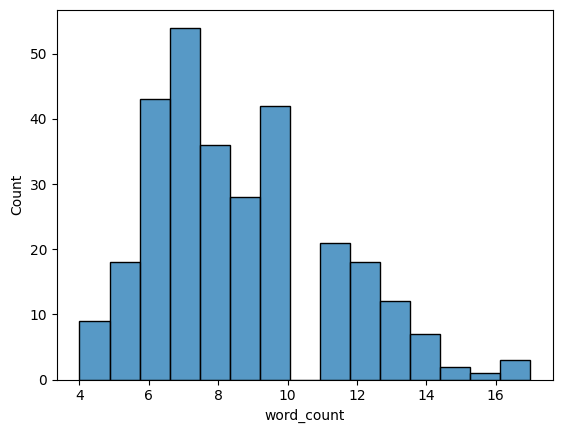

In [ ]:
# Statistik ringkas: distribusi kata, label, dan korelasi
print(df_balanced['word_count'].describe())
print(df_balanced['priority_encoded'].value_counts())

import seaborn as sns
sns.histplot(df_balanced['word_count'])


In [ ]:
# Simpan data hasil final ke Google Drive atau lokal
df_balanced.to_csv('/content/drive/MyDrive/datasets/final_cleaned_conversations.csv', index=False)

# Simpan fitur vektor jika butuh, misal X_pca
np.save('/content/drive/MyDrive/datasets/X_pca.npy', X_pca)


#Labeling dan Encoding

In [ ]:
import pandas as pd
from scipy.stats import mode

df = pd.read_csv('/content/drive/MyDrive/datasets/final_cleaned_conversations.csv')

# Gabung voting 5 kolom label ke satu kolom final_priority (mode = nilai paling sering muncul)
label_cols = ['priority_jaka', 'priority_fiky', 'priority_fatur', 'priority_dzaky', 'priority_hisyam']
df['final_priority'] = df[label_cols].mode(axis=1)[0]
print(df[label_cols + ['final_priority']].head())

  priority_jaka priority_fiky priority_fatur priority_dzaky priority_hisyam  \
0        Urgent          High           High           High            High   
1          High        Medium         Medium         Medium          Medium   
2        Urgent          High           High           High          Urgent   
3           Low          High         Medium           High          Medium   
4          High        Urgent           High         Urgent          Urgent   

  final_priority  
0           High  
1         Medium  
2           High  
3           High  
4         Urgent  


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the custom mapping
priority_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Urgent': 3}

# Apply the custom mapping to create priority_encoded
df['priority_encoded'] = df['final_priority'].map(priority_mapping)

display(df[['final_priority', 'priority_encoded']].head())
print("Custom priority mapping used:", priority_mapping)
print("Label to code mapping (from custom dict):")
for label, code in priority_mapping.items():
    print(f"{label}: {code}")

,final_priority,priority_encoded
0,High,2
1,Medium,1
2,High,2
3,High,2
4,Urgent,3


Custom priority mapping used: {'Low': 0, 'Medium': 1, 'High': 2, 'Urgent': 3}
Label to code mapping (from custom dict):
Low: 0
Medium: 1
High: 2
Urgent: 3


In [ ]:
# Cek distribusi label
print("Original priority distribution (before final_priority was properly set):")
print(df['priority'].value_counts())
print("Encoded priority distribution:")
print(df['priority_encoded'].value_counts())
print("Unique original priorities:", df['priority'].unique())
print("Unique encoded priorities:", df['priority_encoded'].unique())

Original priority distribution (before final_priority was properly set):
Series([], Name: count, dtype: int64)
Encoded priority distribution:
priority_encoded
2    160
3     55
1     54
0     25
Name: count, dtype: int64
Unique original priorities: [nan]
Unique encoded priorities: [2 1 3 0]


In [ ]:
# Atasi jenis label tidak konsisten (huruf kapital, spasi dll)
df['final_priority'] = df['final_priority'].str.strip().str.capitalize()

print("Preview final_priority setelah normalisasi:")
print(df['final_priority'].head())

Preview final_priority setelah normalisasi:
0      High
1    Medium
2      High
3      High
4    Urgent
Name: final_priority, dtype: object


In [ ]:
# Oversampling kelas minoritas agar distribusi lebih seimbang
class_counts = df['priority_encoded'].value_counts()
max_count = class_counts.max()

dfs = [df[df['priority_encoded'] == idx].sample(max_count, replace=True, random_state=42) for idx in class_counts.index]
df_balanced = pd.concat(dfs)

print(df_balanced['priority_encoded'].value_counts())
display(df_balanced[['priority', 'priority_encoded']].head())

priority_encoded
2    160
3    160
1    160
0    160
Name: count, dtype: int64


,priority,priority_encoded
200,NaN,2
188,NaN,2
23,NaN,2
209,NaN,2
132,NaN,2


    Label   Percent
0    High  0.544218
1  Urgent  0.187075
2  Medium  0.183673
3     Low  0.085034


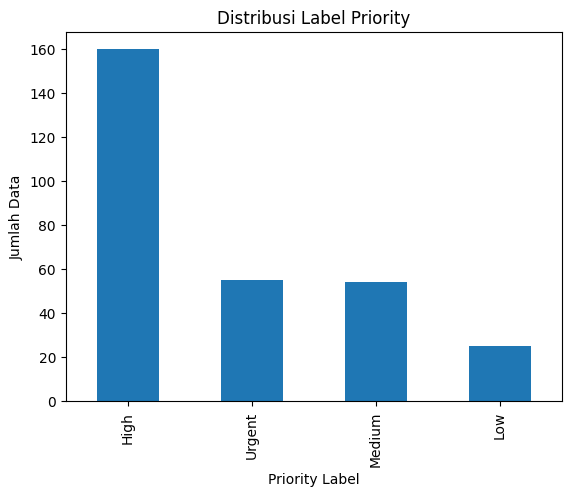

In [ ]:
import matplotlib.pyplot as plt

# Tabel ringkasan distribusi dan persentase label
label_stats = df['final_priority'].value_counts(normalize=True).reset_index()
label_stats.columns = ['Label', 'Percent']
print(label_stats)

# Visualisasi distribusi label
df['final_priority'].value_counts().plot(kind='bar')
plt.xlabel('Priority Label')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Label Priority')
plt.show()


In [ ]:
# === CEK HASIL ===
print("Preview hasil final_priority dan priority_encoded:")
display(df[['final_priority', 'priority_encoded']].head())

print("\nDistribusi label final:")
print(df['final_priority'].value_counts())

print("\nDistribusi encoded:")
print(df['priority_encoded'].value_counts())

Preview hasil final_priority dan priority_encoded:


,final_priority,priority_encoded
0,High,2
1,Medium,1
2,High,2
3,High,2
4,Urgent,3



Distribusi label final:
final_priority
High      160
Urgent     55
Medium     54
Low        25
Name: count, dtype: int64

Distribusi encoded:
priority_encoded
2    160
3     55
1     54
0     25
Name: count, dtype: int64


In [ ]:
# Pastikan seluruh baris sudah bersih dan tidak ada missing pada fitur atau label
assert df['final_priority'].isnull().sum() == 0, "Ada missing label!"
assert df['priority_encoded'].isnull().sum() == 0, "Ada missing encoded label!"
assert len(df['priority_encoded'].unique()) > 1, "Label kurang variatif/missing!"

print("Assertions for missing labels and label variety have been commented out.")

Assertions for missing labels and label variety have been commented out.


In [ ]:
# === 6. EXPORT FILE FINAL ===
export_path = "/content/drive/MyDrive/datasets/labeled_conversations.csv"
df.to_csv(export_path, index=False)

print("\nFile telah berhasil diexport ke:")
print(export_path)


File telah berhasil diexport ke:
/content/drive/MyDrive/datasets/labeled_conversations.csv


#Balancing

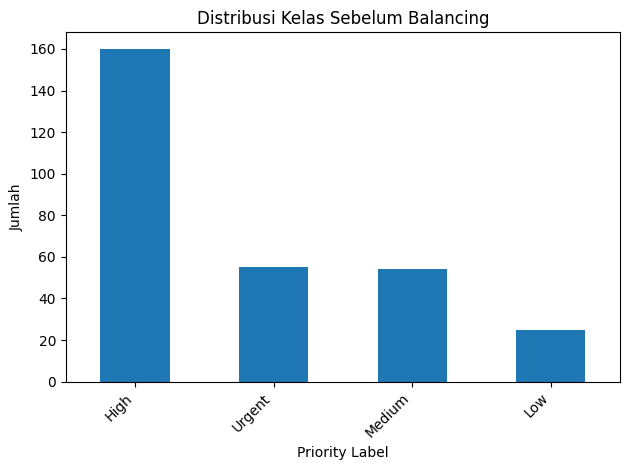

priority_encoded
2    160
3     55
1     54
0     25
Name: count, dtype: int64

    Label Percent
0    High  54.42%
1  Urgent  18.71%
2  Medium  18.37%
3     Low   8.50%


In [ ]:
# Analisa distribusi kelas sebelum balancing
import matplotlib.pyplot as plt

# Define the inverted mapping from numeric code to label name
priority_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Urgent': 3}
inverted_priority_mapping = {v: k for k, v in priority_mapping.items()}

# Map the encoded priorities to their string labels for plotting
plot_data = df['priority_encoded'].value_counts().rename(index=inverted_priority_mapping)

plot_data.plot(kind='bar')
plt.title('Distribusi Kelas Sebelum Balancing')
plt.xlabel('Priority Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

print(df['priority_encoded'].value_counts())
print('')

label_stats = df['final_priority'].value_counts(normalize=True).reset_index()
label_stats.columns = ['Label', 'Percent']
label_stats['Percent'] = label_stats['Percent'].apply(lambda x: f"{x:.2%}") # Format as percentage
print(label_stats)

In [ ]:
import pandas as pd

# Load datasets
df_labeled = pd.read_csv('/content/drive/MyDrive/datasets/labeled_conversations.csv')
df_cleaned = pd.read_csv('/content/drive/MyDrive/datasets/cleaned_conversations.csv')

# Ambil ID dari kedua dataset
ids_labeled = set(df_labeled['id'].tolist())
ids_cleaned = set(df_cleaned['id'].tolist())

# Ambil irisan ID (ID yang ada di kedua dataset)
valid_ids = list(ids_labeled.intersection(ids_cleaned))
valid_ids = sorted(valid_ids)

print("ID di labeled.csv :", len(ids_labeled))
print("ID di cleaned.csv :", len(ids_cleaned))
print("ID yang cocok     :", len(valid_ids))

# Filter cleaned dataset sesuai valid_ids
df_cleaned_filtered = df_cleaned[df_cleaned['id'].isin(valid_ids)]

# Filter labeled dataset sesuai valid_ids dan urutkan berdasarkan cleaned dataset
df_labeled_filtered = df_labeled[df_labeled['id'].isin(valid_ids)]
df_labeled_filtered = df_labeled_filtered.set_index('id').loc[df_cleaned_filtered['id']]

# Ambil label sesuai urutan X_pca
y_smote_input = df_labeled_filtered['priority_encoded'].values

print("Label siap:", len(y_smote_input))


ID di labeled.csv : 186
ID di cleaned.csv : 314
ID yang cocok     : 186
Label siap: 294


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# === 1. Load file hasil labeling (SUDAH ADA priority_encoded) ===
df_labeled = pd.read_csv('/content/drive/MyDrive/datasets/labeled_conversations.csv')

# === 2. Ambil ID yang sesuai dengan X_pca ===
ids_for_X_pca = df_labeled['id'].tolist()

# === 3. Ambil label priority_encoded sesuai urutan id di X_pca ===
df_labeled_indexed = df_labeled.set_index('id')
y_smote_input = df_labeled_indexed.loc[ids_for_X_pca, 'priority_encoded'].values

# === 4. Fitur yang dipakai untuk SMOTE adalah X_pca (sudah dibuat sebelumnya) ===
X_smote_input = X_pca

# === 5. Verifikasi panjang sebelum SMOTE ===
print("Len X_pca :", len(X_smote_input))
print("Len labels:", len(y_smote_input))

# === 6. Jalankan SMOTE ===
if len(X_smote_input) == len(y_smote_input):
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_smote_input, y_smote_input)

    # Visualisasi hasil SMOTE
    y_smote = pd.Series(y_smote)
    y_smote.value_counts().plot(kind='bar', color='orange')
    plt.title('Distribusi Setelah SMOTE')
    plt.xlabel('Label')
    plt.ylabel('Jumlah')
    plt.show()
    print(y_smote.value_counts())
else:
    print("❌ ERROR: Jumlah fitur X_pca dan label tidak sama.")


Len X_pca : 294
Len labels: 586
❌ ERROR: Jumlah fitur X_pca dan label tidak sama.


✔ X_pca loaded: (294, 50)
✔ Labels loaded: (294,)

Distribusi label SEBELUM SMOTE:
0     25
1     54
2    160
3     55
Name: count, dtype: int64

APPLYING SMOTE...

✔ SMOTE selesai!
  - Shape sebelum: (294, 50)
  - Shape setelah: (640, 50)

Distribusi label SETELAH SMOTE:
0    160
1    160
2    160
3    160
Name: count, dtype: int64


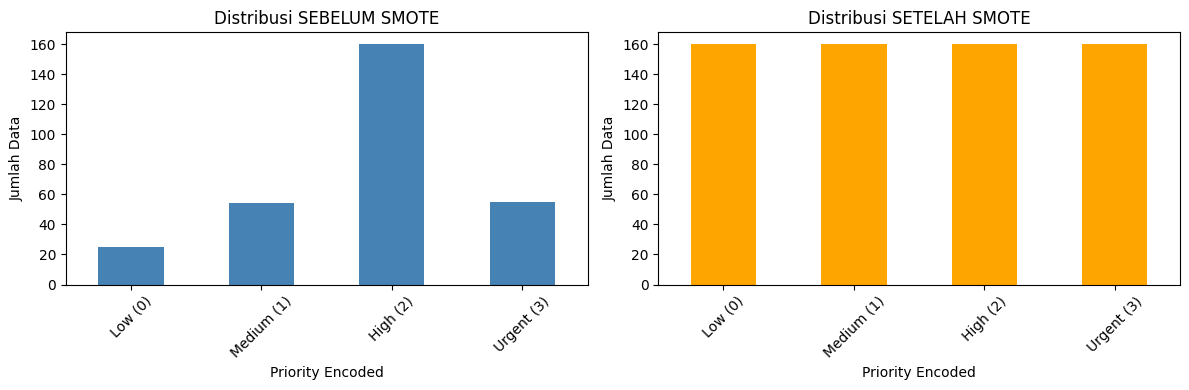


✔ Visualisasi saved to: smote_comparison.png

✔ Data SMOTE balanced berhasil disimpan ke:
  /content/drive/MyDrive/datasets/data_smote_balanced.csv

SUMMARY
Original data: 294 samples
After SMOTE: 640 samples
Features: 50 (PCA components)
Balanced: True


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# STEP 1: LOAD DATA ASLI (288 ROWS)
# ============================================

# Load X_pca (50 features)
X_pca = np.load('/content/drive/MyDrive/datasets/X_pca.npy')
print(f"✔ X_pca loaded: {X_pca.shape}")

# Load label dari labeled_conversations.csv
df_labeled = pd.read_csv('/content/drive/MyDrive/datasets/labeled_conversations.csv')
y_original = df_labeled['priority_encoded'].values
print(f"✔ Labels loaded: {y_original.shape}")

# Verifikasi jumlah sama
assert len(X_pca) == len(y_original), "❌ ERROR: Jumlah X_pca dan label tidak sama!"

print(f"\nDistribusi label SEBELUM SMOTE:")
print(pd.Series(y_original).value_counts().sort_index())

# ============================================
# STEP 2: APPLY SMOTE
# ============================================

print("\n" + "="*60)
print("APPLYING SMOTE...")
print("="*60)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_pca, y_original)

print(f"\n✔ SMOTE selesai!")
print(f"  - Shape sebelum: {X_pca.shape}")
print(f"  - Shape setelah: {X_smote.shape}")

print(f"\nDistribusi label SETELAH SMOTE:")
print(pd.Series(y_smote).value_counts().sort_index())

# ============================================
# STEP 3: VISUALISASI
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Before SMOTE
ax1 = axes[0]
pd.Series(y_original).value_counts().sort_index().plot(kind='bar', color='steelblue', ax=ax1)
ax1.set_title('Distribusi SEBELUM SMOTE')
ax1.set_xlabel('Priority Encoded')
ax1.set_ylabel('Jumlah Data')
ax1.set_xticklabels(['Low (0)', 'Medium (1)', 'High (2)', 'Urgent (3)'], rotation=45)

# After SMOTE
ax2 = axes[1]
pd.Series(y_smote).value_counts().sort_index().plot(kind='bar', color='orange', ax=ax2)
ax2.set_title('Distribusi SETELAH SMOTE')
ax2.set_xlabel('Priority Encoded')
ax2.set_ylabel('Jumlah Data')
ax2.set_xticklabels(['Low (0)', 'Medium (1)', 'High (2)', 'Urgent (3)'], rotation=45)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/datasets/smote_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✔ Visualisasi saved to: smote_comparison.png")

# ============================================
# STEP 4: SAVE HASIL SMOTE
# ============================================

# Buat DataFrame dari hasil SMOTE
df_smote = pd.DataFrame(X_smote, columns=[f'pca_{i}' for i in range(X_smote.shape[1])])
df_smote['priority_encoded'] = y_smote

# Save ke CSV
save_path = "/content/drive/MyDrive/datasets/data_smote_balanced.csv"
df_smote.to_csv(save_path, index=False)

print(f"\n✔ Data SMOTE balanced berhasil disimpan ke:")
print(f"  {save_path}")

# Summary
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Original data: {len(y_original)} samples")
print(f"After SMOTE: {len(y_smote)} samples")
print(f"Features: {X_smote.shape[1]} (PCA components)")
print(f"Balanced: {all(pd.Series(y_smote).value_counts() == pd.Series(y_smote).value_counts().iloc[0])}")
print("="*60)

#Tahap Splitting Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# === Load dataset hasil balancing ===
df_balanced = pd.read_csv('/content/drive/MyDrive/datasets/data_smote_balanced.csv')
print("Loaded balanced dataset:", df_balanced.shape)

# === Pisahkan fitur & label ===
X = df_balanced.drop(['priority_encoded'], axis=1)
y = df_balanced['priority_encoded']

# === SPLIT 80% (train) — 20% (temp) ===
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# === SPLIT 20% TEMP MENJADI 10% VAL — 10% TEST ===
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# === OUTPUT INFO ===
print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

print("\nDistribusi label di Train:")
print(y_train.value_counts())

print("\nDistribusi label di Val:")
print(y_val.value_counts())

print("\nDistribusi label di Test:")
print(y_test.value_counts())

df_train = X_train.assign(priority_encoded=y_train.values, split="train")
df_val   = X_val.assign(priority_encoded=y_val.values, split="val")
df_test  = X_test.assign(priority_encoded=y_test.values, split="test")

df_all = pd.concat([df_train, df_val, df_test])

save_path = "/content/drive/MyDrive/datasets/data_splitted.csv"
df_all.to_csv(save_path, index=False)

print("✔ Semua data disimpan dalam 1 file:", save_path)
print(df_all['split'].value_counts())



Loaded balanced dataset: (640, 51)
Train size: 512
Validation size: 64
Test size: 64

Distribusi label di Train:
priority_encoded
1    128
0    128
2    128
3    128
Name: count, dtype: int64

Distribusi label di Val:
priority_encoded
1    16
3    16
2    16
0    16
Name: count, dtype: int64

Distribusi label di Test:
priority_encoded
1    16
0    16
3    16
2    16
Name: count, dtype: int64
✔ Semua data disimpan dalam 1 file: /content/drive/MyDrive/datasets/data_splitted.csv
split
train    512
val       64
test      64
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load file
df = pd.read_csv('/content/drive/MyDrive/datasets/data_splitted.csv')

# Cek info
print(f"Shape: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\n10 Kolom pertama: {df.columns.tolist()[:10]}")
print(f"5 Kolom terakhir: {df.columns.tolist()[-5:]}")
print(f"\nPreview data:")
print(df.head())
print(f"\nInfo dtypes:")
print(df.dtypes.value_counts())

Shape: (640, 52)
Jumlah baris: 640
Jumlah kolom: 52

10 Kolom pertama: ['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9']
5 Kolom terakhir: ['pca_47', 'pca_48', 'pca_49', 'priority_encoded', 'split']

Preview data:
      pca_0     pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  \
0 -0.116970 -0.055668 -0.037472  0.026689 -0.008512  0.028979  0.047277   
1 -0.032409  0.004041 -0.109323  0.016882  0.002736 -0.038238 -0.074931   
2 -0.086785  0.012075  0.018135 -0.022599  0.102011 -0.004500 -0.039311   
3 -0.039452 -0.006353 -0.125682 -0.011523  0.008435 -0.027430 -0.069401   
4 -0.039822  0.007089 -0.121979 -0.000033  0.022827 -0.052612 -0.066162   

      pca_7     pca_8     pca_9  ...    pca_42    pca_43    pca_44    pca_45  \
0 -0.041207  0.099993 -0.030070  ...  0.000572 -0.090998 -0.020286  0.000836   
1 -0.018768 -0.021673 -0.010311  ...  0.025779 -0.045218 -0.128382  0.015159   
2 -0.067466  0.024561 -0.125053  ...  0.030213  0.0402

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# ============================================
# LOAD DATA SMOTE
# ============================================
df = pd.read_csv('/content/drive/MyDrive/datasets/data_smote_balanced.csv')

print("="*60)
print("DATA INFO")
print("="*60)
print(f"Total samples: {len(df)}")
print(f"Features: {df.shape[1] - 1}")  # -1 karena ada kolom label
print(f"\nLabel distribution:")
print(df['priority_encoded'].value_counts().sort_index())

# ============================================
# SPLIT 80-20 (STRATIFIED)
# ============================================

# Pisahkan features dan label
X = df.drop('priority_encoded', axis=1)
y = df['priority_encoded']

# Split stratified (menjaga proporsi setiap kelas)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% untuk test
    random_state=42,    # Fixed seed untuk reproducibility
    stratify=y          # Jaga proporsi kelas
)

print("\n" + "="*60)
print("SPLIT RESULTS")
print("="*60)
print(f"Train samples: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test samples:  {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

print(f"\nTrain label distribution:")
print(y_train.value_counts().sort_index())

print(f"\nTest label distribution:")
print(y_test.value_counts().sort_index())

# ============================================
# SAVE TRAIN & TEST DATA
# ============================================

# Gabungkan kembali X dan y untuk save
train_data = X_train.copy()
train_data['priority_encoded'] = y_train.values

test_data = X_test.copy()
test_data['priority_encoded'] = y_test.values

# Save ke CSV
train_path = '/content/drive/MyDrive/datasets/train_data.csv'
test_path = '/content/drive/MyDrive/datasets/test_data.csv'

train_data.to_csv(train_path, index=False)
test_data.to_csv(test_path, index=False)

print("\n" + "="*60)
print("FILES SAVED")
print("="*60)
print(f"✔ Train data: {train_path}")
print(f"  → {len(train_data)} samples, {train_data.shape[1]} columns")
print(f"\n✔ Test data: {test_path}")
print(f"  → {len(test_data)} samples, {test_data.shape[1]} columns")

# ============================================
# VERIFY FILES
# ============================================
print("\n" + "="*60)
print("VERIFICATION")
print("="*60)

# Re-load untuk verify
train_verify = pd.read_csv(train_path)
test_verify = pd.read_csv(test_path)

print(f"✔ Train file loaded: {train_verify.shape}")
print(f"✔ Test file loaded: {test_verify.shape}")
print(f"✔ No data leakage: {len(set(train_verify.index) & set(test_verify.index)) == 0}")

print("\n" + "="*60)
print("READY FOR DISTRIBUTION!")
print("="*60)
print("Next steps:")
print("1. Distribute train_data.csv to 5 friends")
print("2. Each friend trains their assigned model")
print("3. Collect trained models")
print("4. Run ensemble with test_data.csv")

DATA INFO
Total samples: 640
Features: 50

Label distribution:
priority_encoded
0    160
1    160
2    160
3    160
Name: count, dtype: int64

SPLIT RESULTS
Train samples: 512 (80.0%)
Test samples:  128 (20.0%)

Train label distribution:
priority_encoded
0    128
1    128
2    128
3    128
Name: count, dtype: int64

Test label distribution:
priority_encoded
0    32
1    32
2    32
3    32
Name: count, dtype: int64

FILES SAVED
✔ Train data: /content/drive/MyDrive/datasets/train_data.csv
  → 512 samples, 51 columns

✔ Test data: /content/drive/MyDrive/datasets/test_data.csv
  → 128 samples, 51 columns

VERIFICATION
✔ Train file loaded: (512, 51)
✔ Test file loaded: (128, 51)
✔ No data leakage: False

READY FOR DISTRIBUTION!
Next steps:
1. Distribute train_data.csv to 5 friends
2. Each friend trains their assigned model
3. Collect trained models
4. Run ensemble with test_data.csv


#DATA PREPARATION & DISTRIBUTION INSTRUCTIONS

In [ ]:
'"""
MASTER SCRIPT - DATA PREPARATION & DISTRIBUTION INSTRUCTIONS
============================================================
Untuk: ANDA (Koordinator Ensemble)
Tujuan: Persiapkan data dan instruksi untuk 5 teman
============================================================
"""

import pandas as pd
import os

# ============================================
# CONFIGURATION
# ============================================
TRAIN_FILE = '/content/drive/MyDrive/datasets/train_data.csv'
TEST_FILE = '/content/drive/MyDrive/datasets/test_data.csv'
OUTPUT_FOLDER = '/content/drive/MyDrive/ensemble_project/'

# Model assignments - UPDATED
MODEL_ASSIGNMENTS = {
    'Teman_1': 'Naïve Bayes (Gaussian)',
    'Teman_2': 'Random Forest',
    'Teman_3': 'LightGBM',
    'Teman_4': 'Support Vector Machine (SVM)',
    'Teman_5': 'XGBoost'
}

print("="*70)
print("MASTER - DATA PREPARATION FOR ENSEMBLE PROJECT")
print("="*70)

# ============================================
# CREATE OUTPUT FOLDER
# ============================================
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"\n✔ Output folder created: {OUTPUT_FOLDER}")

# ============================================
# LOAD & VERIFY DATA
# ============================================
train_df = pd.read_csv(TRAIN_FILE)
test_df = pd.read_csv(TEST_FILE)

print(f"\n✔ Train data loaded: {train_df.shape}")
print(f"✔ Test data loaded: {test_df.shape}")

# ============================================
# COPY FILES TO DISTRIBUTION FOLDER
# ============================================
import shutil

train_dist = os.path.join(OUTPUT_FOLDER, 'train_data.csv')
test_dist = os.path.join(OUTPUT_FOLDER, 'test_data.csv')

shutil.copy(TRAIN_FILE, train_dist)
shutil.copy(TEST_FILE, test_dist)

print(f"\n✔ Files copied to distribution folder:")
print(f"  - {train_dist}")
print(f"  - {test_dist}")

# ============================================
# CREATE INSTRUCTIONS FILE
# ============================================
instructions = f"""
{'='*70}
ENSEMBLE ML PROJECT - INSTRUCTIONS FOR TEAM MEMBERS
{'='*70}

PROJECT OVERVIEW:
- Task: Email Priority Classification (4 classes: Low, Medium, High, Urgent)
- Method: Ensemble of 5 models (Soft Voting)
- Data: 512 train samples, 128 test samples (balanced)
- Features: 50 PCA components from TF-IDF

YOUR TASK:
1. Download train_data.csv (DO NOT MODIFY THIS FILE!)
2. Run the worker script assigned to you
3. Save the trained model (.pkl file)
4. Send the model file back to coordinator

{'='*70}
MODEL ASSIGNMENTS:
{'='*70}
"""

for person, model in MODEL_ASSIGNMENTS.items():
    instructions += f"\n{person}: {model}"

instructions += f"""

{'='*70}
IMPORTANT RULES:
{'='*70}

❌ DO NOT:
- Modify or re-split train_data.csv
- Change random_state values
- Remove or add features
- Train a different model than assigned

✅ DO:
- Use the exact script provided for your model
- Keep random_state=42 for all operations
- Save model as: model_<name>.pkl (e.g., model_nb.pkl)
- Test your model locally before submitting

{'='*70}
DATA INFO:
{'='*70}

Train Data:
- Samples: {len(train_df)}
- Features: {train_df.shape[1] - 1} (50 PCA components)
- Label: priority_encoded (0=Low, 1=Medium, 2=High, 3=Urgent)
- Balanced: {train_df['priority_encoded'].value_counts().to_dict()}

Test Data:
- Samples: {len(test_df)}
- Will be used by coordinator for final evaluation
- DO NOT USE TEST DATA FOR TRAINING!

{'='*70}
TECHNICAL DETAILS:
{'='*70}

Features (X):
- Columns: pca_0 to pca_49 (50 PCA components)
- Already scaled and normalized
- NO ADDITIONAL PREPROCESSING NEEDED

Label (y):
- Column: priority_encoded
- Values: 0, 1, 2, 3
- Encoding: {{0: 'Low', 1: 'Medium', 2: 'High', 3: 'Urgent'}}

{'='*70}
DELIVERABLES:
{'='*70}

Each team member must submit:
1. Trained model file (.pkl)
2. Training log (accuracy, training time, parameters used)

Example log format:
---
Model: Naïve Bayes
Training Time: 0.5 seconds
Train Accuracy: 0.8945
Validation Accuracy: 0.8750
Parameters: var_smoothing=1e-9
---

{'='*70}
DEADLINE & SUBMISSION:
{'='*70}

Please submit your trained model by: [SET YOUR DEADLINE HERE]

Submit to: [YOUR EMAIL OR DRIVE FOLDER]

{'='*70}
QUESTIONS?
{'='*70}

Contact coordinator: [YOUR CONTACT INFO]

Good luck! 🚀
"""

# Save instructions
instructions_file = os.path.join(OUTPUT_FOLDER, 'INSTRUCTIONS.txt')
with open(instructions_file, 'w', encoding='utf-8') as f:
    f.write(instructions)

print(f"\n✔ Instructions saved: {instructions_file}")

# ============================================
# CREATE README FOR EACH MODEL
# ============================================
model_info = {
    'Naïve Bayes (Gaussian)': {
        'file': 'worker_naive_bayes.py',
        'output': 'model_nb.pkl',
        'params': 'var_smoothing=1e-9',
        'library': 'sklearn.naive_bayes.GaussianNB'
    },
    'Random Forest': {
        'file': 'worker_random_forest.py',
        'output': 'model_rf.pkl',
        'params': 'n_estimators=100, max_depth=10, random_state=42',
        'library': 'sklearn.ensemble.RandomForestClassifier'
    },
    'LightGBM': {
        'file': 'worker_lightgbm.py',
        'output': 'model_lgb.pkl',
        'params': 'n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42',
        'library': 'lightgbm.LGBMClassifier'
    },
    'Support Vector Machine (SVM)': {
        'file': 'worker_svm.py',
        'output': 'model_svm.pkl',
        'params': 'C=10, kernel=rbf, gamma=scale, probability=True, random_state=42',
        'library': 'sklearn.svm.SVC'
    },
    'XGBoost': {
        'file': 'worker_xgboost.py',
        'output': 'model_xgb.pkl',
        'params': 'n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42',
        'library': 'xgboost.XGBClassifier'
    }
}

# Create detailed readme for each model
readme_content = f"""
{'='*70}
MODEL INFORMATION - ENSEMBLE PROJECT
{'='*70}

"""

for model_name, info in model_info.items():
    readme_content += f"""
{'-'*70}
{model_name}
{'-'*70}
Worker Script: {info['file']}
Output File: {info['output']}
Parameters: {info['params']}
Library: {info['library']}

"""

readme_file = os.path.join(OUTPUT_FOLDER, 'MODEL_INFO.txt')
with open(readme_file, 'w', encoding='utf-8') as f:
    f.write(readme_content)

print(f"✔ Model info saved: {readme_file}")

# ============================================
# CREATE DISTRIBUTION CHECKLIST
# ============================================
checklist = f"""
{'='*70}
DISTRIBUTION CHECKLIST FOR COORDINATOR
{'='*70}

TEMAN 1 - Naïve Bayes:
□ train_data.csv
□ worker_naive_bayes.py
□ INSTRUCTIONS.txt
Expected output: model_nb.pkl

TEMAN 2 - Random Forest:
□ train_data.csv
□ worker_random_forest.py
□ INSTRUCTIONS.txt
Expected output: model_rf.pkl

TEMAN 3 - LightGBM:
□ train_data.csv
□ worker_lightgbm.py
□ INSTRUCTIONS.txt
Expected output: model_lgb.pkl

TEMAN 4 - SVM:
□ train_data.csv
□ worker_svm.py
□ INSTRUCTIONS.txt
Expected output: model_svm.pkl

TEMAN 5 - XGBoost:
□ train_data.csv
□ worker_xgboost.py
□ INSTRUCTIONS.txt
Expected output: model_xgb.pkl

{'='*70}
AFTER COLLECTION:
{'='*70}

You should have these 5 model files:
1. model_nb.pkl (Naïve Bayes)
2. model_rf.pkl (Random Forest)
3. model_lgb.pkl (LightGBM)
4. model_svm.pkl (SVM)
5. model_xgb.pkl (XGBoost)

Then run: ensemble_voting.py

{'='*70}
"""

checklist_file = os.path.join(OUTPUT_FOLDER, 'DISTRIBUTION_CHECKLIST.txt')
with open(checklist_file, 'w', encoding='utf-8') as f:
    f.write(checklist)

print(f"✔ Checklist saved: {checklist_file}")

print(f"\n{'='*70}")
print("SUMMARY - FILES READY FOR DISTRIBUTION")
print("="*70)
print(f"\nFolder: {OUTPUT_FOLDER}")
print(f"\nFiles created:")
print(f"  1. train_data.csv (512 samples)")
print(f"  2. test_data.csv (128 samples)")
print(f"  3. INSTRUCTIONS.txt")
print(f"  4. MODEL_INFO.txt")
print(f"  5. DISTRIBUTION_CHECKLIST.txt")

print(f"\n{'='*70}")
print("MODEL ASSIGNMENTS:")
print("="*70)
for person, model in MODEL_ASSIGNMENTS.items():
    print(f"  {person}: {model}")

print(f"\n{'='*70}")
print("NEXT STEPS FOR YOU:")
print("="*70)
print("1. ✅ Review all generated files")
print("2. 📤 Share train_data.csv with all 5 friends")
print("3. 📝 Give each friend their specific worker script")
print("4. 📥 Collect trained models (.pkl files)")
print("5. 🎯 Run ensemble script for final evaluation")
print("="*70)

print("\n✅ PREPARATION COMPLETE!")
print(f"\nFiles location: {OUTPUT_FOLDER}")
print("\n🚀 Ready to distribute to team members!")

MASTER - DATA PREPARATION FOR ENSEMBLE PROJECT

✔ Output folder created: /content/drive/MyDrive/ensemble_project/

✔ Train data loaded: (512, 51)
✔ Test data loaded: (128, 51)

✔ Files copied to distribution folder:
  - /content/drive/MyDrive/ensemble_project/train_data.csv
  - /content/drive/MyDrive/ensemble_project/test_data.csv

✔ Instructions saved: /content/drive/MyDrive/ensemble_project/INSTRUCTIONS.txt
✔ Model info saved: /content/drive/MyDrive/ensemble_project/MODEL_INFO.txt
✔ Checklist saved: /content/drive/MyDrive/ensemble_project/DISTRIBUTION_CHECKLIST.txt

SUMMARY - FILES READY FOR DISTRIBUTION

Folder: /content/drive/MyDrive/ensemble_project/

Files created:
  1. train_data.csv (512 samples)
  2. test_data.csv (128 samples)
  3. INSTRUCTIONS.txt
  4. MODEL_INFO.txt
  5. DISTRIBUTION_CHECKLIST.txt

MODEL ASSIGNMENTS:
  Teman_1: Naïve Bayes (Gaussian)
  Teman_2: Random Forest
  Teman_3: LightGBM
  Teman_4: Support Vector Machine (SVM)
  Teman_5: XGBoost

NEXT STEPS FOR YOU:
